In [1]:
import pandas as pd
import pandasql as psql
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import lxml
import re


In [2]:
#webscraping for missing data
#driver = webdriver.Chrome(r"C:\Users\bobby\Desktop\Coursera\sql capstone\chromedriver.exe")
#driver.get("https://www.olympedia.org/")
#element=driver.find_element(By.CLASS_NAME,"form-control")
#element.send_keys(Missingdata["Name"][0])
#element=driver.find_element(By.NAME, "commit")
#element.click()
#soup = bs(driver.page_source, "lxml")
#print(re.search("=.*?>",str(soup.find_all("tr")[1])))
#str(Missingdata['Name'][2]).replace("[\(\[].*?[\)\]]","")
#all althetes with missing data
#Missingdata=psql.sqldf("Select * From Athlete where Age is null OR Height is null or Weight is null")

In [3]:
Athlete=pd.read_csv('athlete_events.csv')

In [4]:
Nocregion=pd.read_csv('noc_regions.csv')

In [5]:
Nocregion=psql.sqldf("""
Select NOC, region,
CASE
WHEN region == 'EU' OR region == 'Austria' OR region == 'Belgium' OR region == 'Denmark' OR region == 'Finland' OR region == 'France'
OR region == 'Germany' OR region =='Greece' OR region == ' Ireland' OR region == 'Italy' OR region == 'Luxembourg'
OR region == 'Netherlands' OR region == 'Portugal' OR region =='Spain' OR region == 'Sweden' OR region == 'United Kingdom'
OR region == 'Bulgaria' OR region == 'Croatia' OR region == 'Cyprus' OR region == 'Czech Republic' OR region == 'Estonia'
OR region =='Hungary' OR region == 'Latvia' OR region =='Lithuania' OR region == 'Malta' OR region == 'Poland' OR
region == 'Romania' OR region == 'Slovakia' OR region == 'Slovenia' OR region == 'Iceland' OR region == ' Norway' OR
region == ' Switzerland' OR region == 'Australia' OR region == 'Canada' OR region == 'Japan' OR region == 'New Zealand'
OR region == 'United States' 
THEN
'developed'
ELSE
'undeveloped'
END AS DevOrUndev,
Notes
From Nocregion
""")

In [6]:
Athlete.loc[Athlete['Age'].between(10,15,'left'),'Agebin'] ='10-14'
Athlete.loc[Athlete['Age'].between(15,20,'left'),'Agebin'] ='15-19'
Athlete.loc[Athlete['Age'].between(20,25,'left'),'Agebin'] ='20-24'
Athlete.loc[Athlete['Age'].between(25,30,'left'),'Agebin'] ='25-29'
Athlete.loc[Athlete['Age'].between(30,35,'left'),'Agebin'] ='30-34'
Athlete.loc[Athlete['Age'].between(35,40,'left'),'Agebin'] ='35-39'
Athlete.loc[Athlete['Age'].between(40,45,'left'),'Agebin'] ='40-44'
Athlete.loc[Athlete['Age'].between(45,50,'left'),'Agebin'] ='45-49'
Athlete.loc[Athlete['Age'].between(50,55,'left'),'Agebin'] ='50-54'
Athlete.loc[Athlete['Age'].between(55,60,'left'),'Agebin'] ='55-59'
Athlete.loc[Athlete['Age'].between(60,65,'left'),'Agebin'] ='60-64'
Athlete.loc[Athlete['Age'].between(65,70,'left'),'Agebin'] ='65-69'
Athlete.loc[Athlete['Age'].between(70,75,'left'),'Agebin'] ='70-74'
Athlete.loc[Athlete['Age'].between(75,80,'left'),'Agebin'] ='75-79'
Athlete.loc[Athlete['Age'].between(80,85,'left'),'Agebin'] ='80-84'
Athlete.loc[Athlete['Age'].between(85,90,'left'),'Agebin'] ='85-89'
Athlete.loc[Athlete['Age'].between(90,95,'left'),'Agebin'] ='90-94'
Athlete.loc[Athlete['Age'].between(95,100,'both'),'Agebin'] ='95-100'

In [5]:
#data info for Nocregion
Nocregion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
#Checking for Nulls and data info
Athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


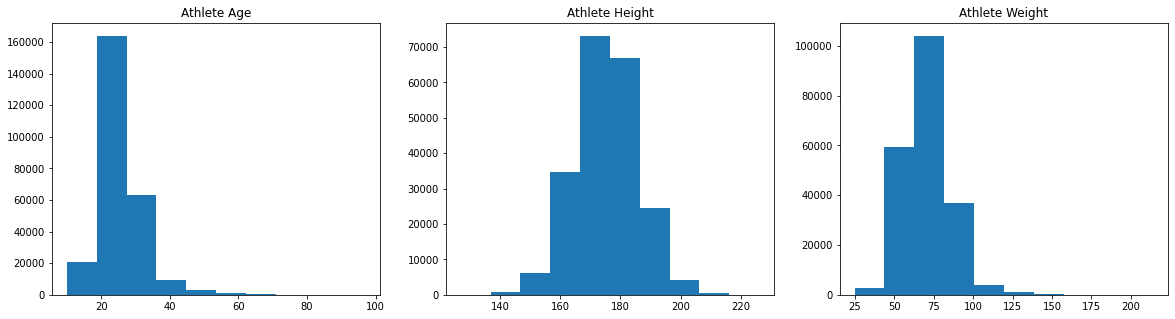

In [8]:
#histograms of Age,Height, and Weight
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3)

ax0.hist(Athlete["Age"])
ax0.set_title("Athlete Age")

ax1.hist(Athlete["Height"])
ax1.set_title("Athlete Height")

ax2.hist(Athlete["Weight"])
ax2.set_title("Athlete Weight")

fig.set_figheight(5)
fig.set_figwidth(20)
plt.show()

In [9]:
#all NOC values in Athlete
Athlete['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [31]:
#all unique sports. 
#hockey is field hockey
#Athletics involves running, jumping, throwing, and walking.
#Rugby Sevens is a smaller version of Rugby
sorted(Athlete['Sport'].unique())

['Aeronautics',
 'Alpine Skiing',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cross Country Skiing',
 'Curling',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Freestyle Skiing',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Luge',
 'Military Ski Patrol',
 'Modern Pentathlon',
 'Motorboating',
 'Nordic Combined',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboarding',
 'Softball',
 'Speed Skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'

In [10]:
Athlete['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [11]:
#full count of sex
psql.sqldf(" Select Sex, COUNT(Sex) From Athlete group by Sex ")

,Sex,COUNT(Sex)
0,F,74522
1,M,196594


In [12]:
#all Games
Athlete['Games'].unique()

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [13]:
#number of seasons
psql.sqldf("Select Season, COUNT(Season) From (Select Year,Season,COUNT(DISTINCT(Season)) As k From Athlete group by Year,Season) as sub group by Season")

,Season,COUNT(Season)
0,Summer,29
1,Winter,22


In [14]:
#all unique cities
Athlete["City"].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [15]:
#Top 10 sports by Count
psql.sqldf("Select Sport , Count(Sport) From Athlete group by Sport order by COUNT(Sport) DESC limit 10")

,Sport,Count(Sport)
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10859
5,Fencing,10735
6,Rowing,10595
7,Cross Country Skiing,9133
8,Alpine Skiing,8829
9,Wrestling,7154


In [16]:
#Top 10 Events by Count
psql.sqldf("SELECT event, count(event) FROM Athlete group by event order by count(event) DESC limit 10")

,Event,count(event)
0,Football Men's Football,5733
1,Ice Hockey Men's Ice Hockey,4762
2,Hockey Men's Hockey,3958
3,Water Polo Men's Water Polo,3358
4,Basketball Men's Basketball,3280
5,"Cycling Men's Road Race, Individual",2947
6,Gymnastics Men's Individual All-Around,2500
7,Rowing Men's Coxed Eights,2423
8,Gymnastics Men's Team All-Around,2411
9,Handball Men's Handball,2264


In [17]:
#top 10 countries with most gold medals
psql.sqldf("SELECT NOC, Medal, COUNT(Medal) FROM Athlete group by NOC, Medal having Medal = 'Gold' order by COUNT(Medal) DESC limit 10")

,NOC,Medal,COUNT(Medal)
0,USA,Gold,2638
1,URS,Gold,1082
2,GER,Gold,745
3,GBR,Gold,678
4,ITA,Gold,575
5,FRA,Gold,501
6,SWE,Gold,479
7,CAN,Gold,463
8,HUN,Gold,432
9,GDR,Gold,397


In [18]:
maxV = psql.sqldf("SELECT max(AGE),max(Weight),max(Height) from Athlete")
minV = psql.sqldf("SELECT min(AGE),min(Weight),min(Height) from Athlete")
median=psql.sqldf("select Age,Weight,Height from athlete LIMIT 1 OFFSET (Select COUNT(*) from Athlete)/2")
average=psql.sqldf("Select avg(age), avg(weight), avg(height) from Athlete")

In [19]:
psql.sqldf("""WITH percent_tb as (SELECT age,
                                  ntile(4) OVER( ORDER BY age) as percent
                                  from Athlete), 

              p_25 as (select (percent * .25) as pct,
                    last_value(age) over (partition by percent) last_val
                    from percent_tb
                    where percent = 1 limit  1),
p_50 as (select (percent * .25) as pct,
        last_value( age) over (partition by percent) last_val
        from percent_tb
        where percent = 2 limit  1),
p_75 as (select (percent * .25) as pct,
        last_value(age) over (partition by percent) last_val
        from percent_tb
        where percent = 3 limit  1),
p_100 as (select (percent * .25) as pct,
        last_value(age) over (partition by percent) last_val
        from percent_tb
        where percent = 4 limit  1)
        
select * from p_25 UNION
select * from p_50 UNION
select * from p_75 UNION
select * from p_100""")


,pct,last_val
0,0.25,21.0
1,0.50,24.0
2,0.75,28.0
3,1.00,97.0


In [20]:
psql.sqldf("""WITH percent_tb as (SELECT height,
                                  ntile(4) OVER( ORDER BY height) as percent
                                  from Athlete), 

p_25 as (select (percent * .25) as pct,
        last_value(height) over (partition by percent) last_val
         from percent_tb
        where percent = 1 limit  1),
p_50 as (select (percent * .25) as pct,
        last_value( height) over (partition by percent) last_val
        from percent_tb
        where percent = 2 limit  1),
p_75 as (select (percent * .25) as pct,
        last_value(height) over (partition by percent) last_val
        from percent_tb
        where percent = 3 limit  1),
p_100 as (select (percent * .25) as pct,
        last_value(height) over (partition by percent) last_val
        from percent_tb
        where percent = 4 limit  1)
        
select * from p_25 UNION
select * from p_50 UNION
select * from p_75 UNION
select * from p_100""")

,pct,last_val
0,0.25,157.0
1,0.50,171.0
2,0.75,180.0
3,1.00,226.0


In [21]:
psql.sqldf("""WITH percent_tb as (SELECT weight,
                                  ntile(4) OVER( ORDER BY height) as percent
                                  from Athlete), 

p_25 as (select (percent * .25) as pct,
        last_value(weight) over (partition by percent) last_val
         from percent_tb
        where percent = 1 limit  1),
p_50 as (select (percent * .25) as pct,
        last_value( weight) over (partition by percent) last_val
        from percent_tb
        where percent = 2 limit  1),
p_75 as (select (percent * .25) as pct,
        last_value(weight) over (partition by percent) last_val
        from percent_tb
        where percent = 3 limit  1),
p_100 as (select (percent * .25) as pct,
        last_value(weight) over (partition by percent) last_val
        from percent_tb
        where percent = 4 limit  1)
        
select * from p_25 UNION
select * from p_50 UNION
select * from p_75 UNION
select * from p_100""")

,pct,last_val
0,0.25,50.0
1,0.50,76.0
2,0.75,77.0
3,1.00,141.0


In [22]:
psql.sqldf("""Select noc,ROUND(avg(age)), COUNT(medal) 
from Athlete 
group by noc 
having COUNT(medal) IS NOT  0 
order by COUNT(medal) DESC 
limit 10""")

,NOC,ROUND(avg(age)),COUNT(medal)
0,USA,26.0,5637
1,URS,25.0,2503
2,GER,27.0,2165
3,GBR,27.0,2068
4,FRA,27.0,1777
5,ITA,26.0,1637
6,SWE,27.0,1536
7,CAN,25.0,1352
8,AUS,25.0,1320
9,RUS,25.0,1165


In [23]:
psql.sqldf(""" 
select age, count(medal)
from Athlete
where medal is not null
group by age
order by count(medal) desc
limit 10
""")

,Age,count(medal)
0,23.0,3395
1,24.0,3289
2,22.0,3159
3,25.0,3124
4,26.0,2924
5,27.0,2690
6,21.0,2684
7,28.0,2335
8,20.0,2004
9,29.0,1941


In [45]:
psql.sqldf(""" 
select age, count(medal),medal
from Athlete
where medal is not null
group by age
having medal = 'Gold'
order by count(medal) desc
limit 10
""")

,avg(age),count(medal),Medal
0,25.0,3124,Gold
1,27.0,2690,Gold
2,21.0,2684,Gold
3,20.0,2004,Gold
4,29.0,1941,Gold
5,31.0,1250,Gold
6,34.0,640,Gold
7,35.0,485,Gold
8,38.0,245,Gold
9,15.0,196,Gold


In [25]:
psql.sqldf("""
select age, count(medal)
from Athlete
where medal is not null
group by age
having medal = 'Silver'
order by count(medal) desc
limit 10
""")

,avg(age),count(medal)
0,24.0,3289
1,22.0,3159
2,26.0,2924
3,19.0,1369
4,33.0,792
5,36.0,383
6,42.0,121
7,44.0,117
8,43.0,101
9,48.0,52


In [26]:
psql.sqldf("""
select age, count(medal)
from Athlete
where medal is not null
group by age
having medal = 'Bronze'
order by count(medal) desc
limit 10
""")

,avg(age),count(medal)
0,23.0,3395
1,28.0,2335
2,30.0,1599
3,32.0,1011
4,18.0,860
5,NaN,732
6,17.0,534
7,16.0,350
8,37.0,277
9,40.0,203


In [27]:
psql.sqldf(""" 
select Agebin, count(medal)
from Athlete
where medal is not null
group by Agebin
order by count(medal) desc
limit 10
""")

,Agebin,count(medal)
0,20-25,14531
1,25-30,13014
2,30-35,5292
3,15-20,3309
4,35-40,1578
5,None,732
6,40-45,683
7,45-50,309
8,50-55,135
9,10-15,99


In [32]:
psql.sqldf(""" 
select Agebin, count(medal), medal
from Athlete
where medal is not null and medal ='Gold'
group by Agebin
order by count(medal) desc
""")

,Agebin,count(medal),Medal
0,20-25,4966,Gold
1,25-30,4346,Gold
2,30-35,1795,Gold
3,15-20,1129,Gold
4,35-40,544,Gold
5,40-45,229,Gold
6,None,148,Gold
7,45-50,104,Gold
8,50-55,49,Gold
9,10-15,34,Gold


In [34]:
psql.sqldf(""" 
select Agebin, count(medal)
from Athlete
where medal is not null and medal ='Silver'
group by Agebin
order by count(medal) desc
limit 10
""")

,Agebin,count(medal)
0,20-25,4671
1,25-30,4281
2,30-35,1790
3,15-20,1094
4,35-40,526
5,None,295
6,40-45,232
7,45-50,99
8,50-55,43
9,10-15,41


In [36]:
psql.sqldf(""" 
select Agebin, count(medal)
from Athlete
where medal is not null and medal ='Bronze'
group by Agebin
order by count(medal) desc
limit 10
""")

,Agebin,count(medal)
0,20-25,4894
1,25-30,4387
2,30-35,1707
3,15-20,1086
4,35-40,508
5,None,289
6,40-45,222
7,45-50,106
8,50-55,43
9,10-15,24


In [42]:
psql.sqldf("""
select Count(Medal)
from Athlete
where Age < 25 and medal is not null and medal ='Gold'
""")

,Count(Medal)
0,6129


In [43]:
psql.sqldf("""
select Count(Medal)
from Athlete
where Age >= 25 and medal is not null and medal ='Gold'
""")

,Count(Medal)
0,7095


In [35]:
Agemedal =psql.sqldf(""" 
select agebin, count(medal) as medal
from Athlete
where medal is not null and agebin is not null
group by agebin
order by agebin
""")
AgemedalGold =psql.sqldf(""" 
select agebin, count(medal) as medal
from Athlete
where medal is not null and agebin is not null and medal = 'Gold'
group by agebin
order by agebin
""")
AgemedalSilver =psql.sqldf(""" 
select agebin, count(medal) as medal
from Athlete
where medal is not null and agebin is not null and medal = 'Silver'
group by agebin
order by agebin
""")
AgemedalBronze =psql.sqldf(""" 
select agebin, count(medal) as medal
from Athlete
where medal is not null and agebin is not null and medal = 'Bronze'
group by agebin
order by agebin
""")

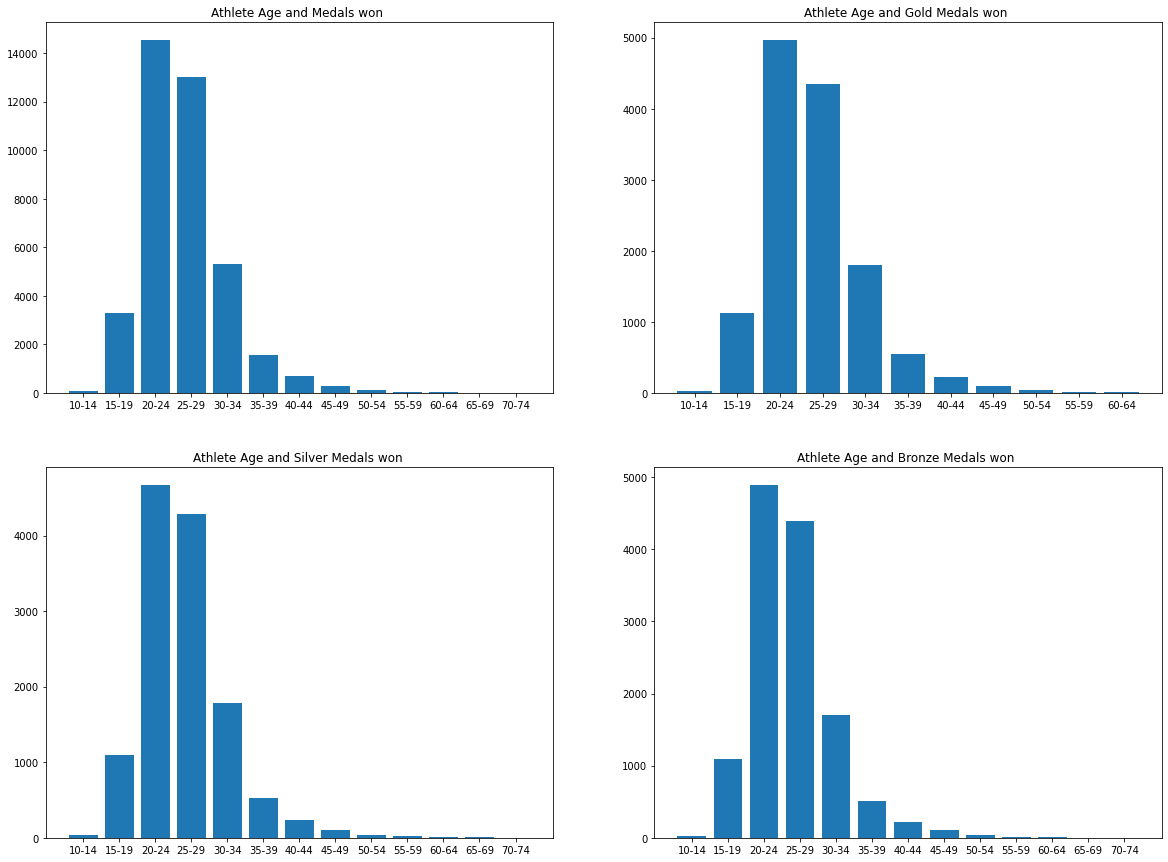

In [36]:


fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.bar(Agemedal['Agebin'], Agemedal['medal'])
ax0.set_title("Athlete Age and Medals won ")

ax1.bar(AgemedalGold['Agebin'], AgemedalGold['medal'])
ax1.set_title("Athlete Age and Gold Medals won ")

ax2.bar(AgemedalSilver['Agebin'], AgemedalSilver['medal'])
ax2.set_title("Athlete Age and Silver Medals won ")

ax3.bar(AgemedalBronze['Agebin'], AgemedalBronze['medal'])
ax3.set_title("Athlete Age and Bronze Medals won ")


fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

In [29]:
psql.sqldf(""" 
select NOC,sport,max(CountM) As NumberofMedals
from( select NOC, sport , count(medal) as CountM
from Athlete
where medal is not null
group by NOC, sport)
group by sport
order by max(CountM) DESC
limit 10
""")

,NOC,sport,NumberofMedals
0,USA,Athletics,1080
1,USA,Swimming,1078
2,USA,Rowing,375
3,ITA,Fencing,359
4,CAN,Ice Hockey,348
5,USA,Basketball,341
6,URS,Gymnastics,288
7,NED,Hockey,255
8,USA,Shooting,193
9,GBR,Cycling,182


In [30]:

psql.sqldf("""
SELECT DevOrUndev,sport,max(Cmedal) As NumberofMedals
FROM(select DevOrUndev,sport,count(medal) as Cmedal
from Athlete as a
join Nocregion as n on a.NOC = n.NOC
where medal is not null
group by DevOrUndev,sport) as sub
group by sport
order by max(Cmedal) DESC
Limit 10
""")

,DevOrUndev,sport,NumberofMedals
0,undeveloped,Athletics,2549
1,developed,Rowing,1894
2,undeveloped,Swimming,1571
3,developed,Fencing,1310
4,developed,Gymnastics,1236
5,developed,Ice Hockey,951
6,developed,Canoeing,921
7,developed,Hockey,851
8,developed,Cycling,846
9,undeveloped,Basketball,818


In [8]:
psql.sqldf("""
select DevOrUndev,count(medal) as Cmedal
from Athlete as a
join Nocregion as n on a.NOC = n.NOC
where medal is not null
group by DevOrUndev
""")

,DevOrUndev,Cmedal
0,developed,20543
1,undeveloped,19231


In [39]:
stats=psql.sqldf("""
SELECT year,avg(weight),avg(height), avg(age)
FROM Athlete
group by year
""")

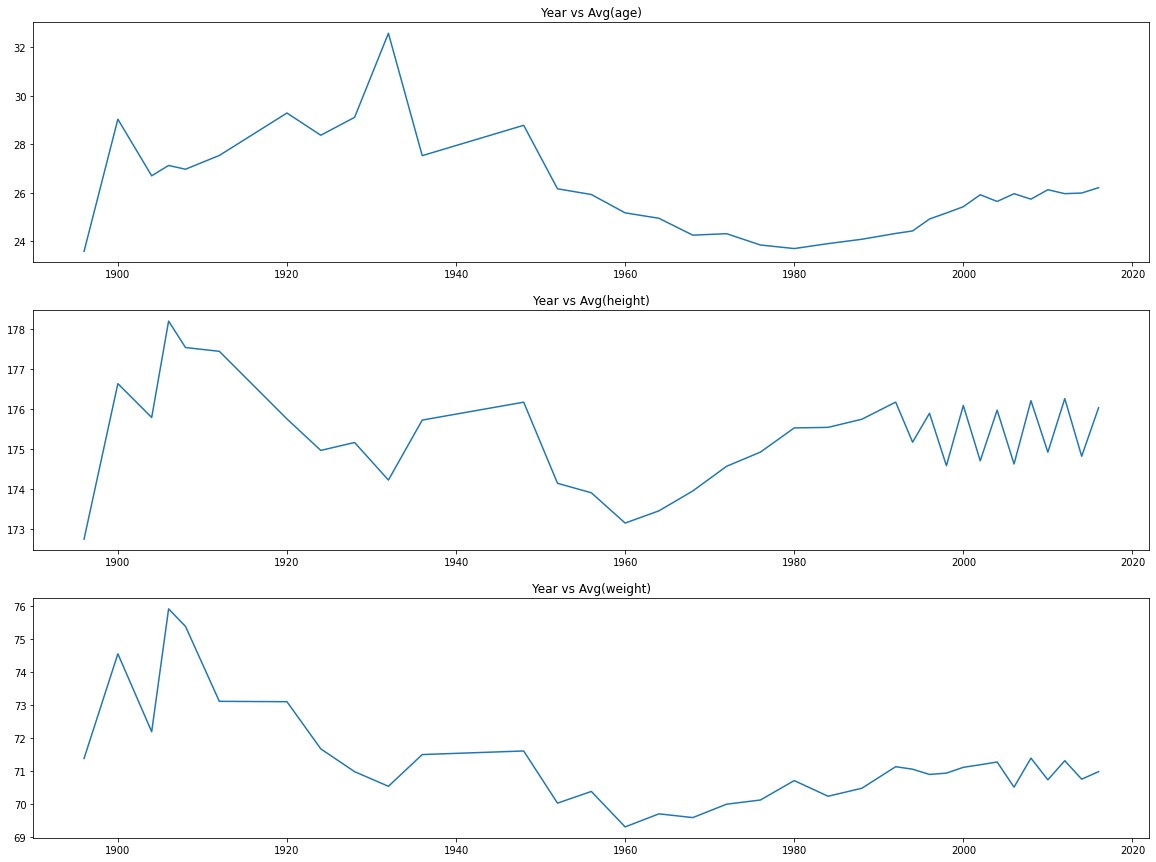

In [40]:
fig, ((ax0), (ax1),(ax2)) = plt.subplots(nrows=3, ncols=1)

ax0.plot(boxingstats['Year'],boxingstats['avg(age)'])
ax0.set_title('Year vs Avg(age)')

ax1.plot(boxingstats['Year'],boxingstats['avg(height)'])
ax1.set_title('Year vs Avg(height)')

ax2.plot(boxingstats['Year'],boxingstats['avg(weight)'])
ax2.set_title('Year vs Avg(weight)')

fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

,Year,avg(weight),avg(height),avg(age)
0,1896,71.387755,172.739130,23.580645
1,1900,74.556962,176.637931,29.034031
2,1904,72.197279,175.788732,26.698150
3,1906,75.917073,178.206226,27.125253
4,1908,75.386128,177.543158,26.970228
5,1912,73.117450,177.447989,27.538620
6,1920,73.106157,175.752282,29.290978
7,1924,71.678261,174.963039,28.373325
8,1928,70.987465,175.162051,29.112557
9,1932,70.544545,174.220115,32.582080
